- Deep_learning: 머신러닝 알고리즘의 한 종류, 데이터처리 유닛의 층을 여러개 쌓아 구조적이지 않은 데이터에서 고수준의 표현을 학습하는 것. 즉 규칙을 찾는것
- 정형데이터: 사람의 나이, 소득, 방문횟수 등 분석해서 이진 응답 변수로 어떤 서비스를 구독할지 예측 출력 구독안할듯0,구독할듯1
- 비정형 데이터: 이미지(공간구조), 텍스트(시간 구조), 오디오파일(시간구조), 영상(시간구조 및 공간 구조) 등등
- 정형데이터 => logistics_regression, random_forest, XGboost등에 공간 의존적 입력이 아닐경우 유리
- 비정형 데이터 => 고수준의(공간적인 데이터특성) 정보를 특성화하여 학습할수있기에 딥러닝을 사용하는것이 유리
- 특히나 생성 모델은 이러한 비정형 데이터를 만들어 내는것이기 때문에 딥러닝을 이용

## 심층 신경망
- 은닉층을 이용하는 인공신경망과 거의 동의어처럼 사용된다.
- 층을 쌓으며 층은 유닛(뉴런)을 가진다. 이전층의 유닛과 가중치로 연결된다.
- 완전 연결층(fully_connected_layer) = 밀집층(dense_layer)
- 인접한 모든층의 유닛이 완전히 연결된 신경망을 multilayer_perception(MLP)
- 데이터가출력층에 도달 할때까지 순서대로 변환되는것을 forward pass(정방향 계산)
- 각유닛은 입력의 가중치 합에 비선형 변환을 적용하고 다음층으로 전달한다.
- 정확한 예측을 만드는 각층의가중치 조합을 찾는 것을 네트워크 training 이라고 한다.
- batch: 데이터셋 전체
- mini_batch: 데이터셋을 동일한 갯수로 나눠논것

- 훈련하는 동안 미니배치가 네트워크에 전달되 출력된 예측값을 정답과 비교한다.
이때 나오는 예측오류를 네트워크를 통해 거꾸로 전파되어 예측을 향상하는 방향으로 가중치를 조금씩 수정한다. 이를 backpropagation

### 고수준의 특성 학습
- 신경망은 사람의 개입없이 특성을 학습하는 능력이 핵심이다.
=> feature engineering 이 필요없다.
- tensorflow: 파이썬 머신러닝 라이브러리이자, 머신러닝 솔루션 프레임 워크
- keras: tensorflow위에 구축된 고수준의 API. functional API를 사용하여 복잡한 커스텀 구현가능.

### 다층 퍼셉트론
- supervise_learning을 사용해 이미지를분류하는 MLP(판별모델)를 훈련해본다.
- 지도학습은 레이블이 있는 데이터셋을 훈려시키는 머신러닝 알고리즘을 뜻한다.


In [1]:
import numpy as np
from tensorflow.keras import datasets, utils

(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()
NUM_CLASSES = 10

# 이미지 픽셀값의 범위 0~255를 0~1사이의 값으로 normalization , min_max scaling
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 레이블을 원핫 인코딩한다
y_train = utils.to_categorical(y_train,NUM_CLASSES)
y_test = utils.to_categorical(y_test,NUM_CLASSES)

# 스케일링 잘되었는지 확인
# (50000, 32, 32, 3)의 shape이다
#이를 4차원 텐서라고한다.
# 5만개 이미지, 32x32크기의 픽셀, 3개의 RGB 색차원
print(x_train[0])
# 원핫인코딩 잘되었는지확인 
print(y_train[0])


[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [2]:
x_train.shape

(50000, 32, 32, 3)

### 모델 만들기 
- 신경망의 구조는 sequential클래스 모델 또는 functional API로 만들수있다.
- seq은 분기없이 일렬로층을만들어 빠르게 사용가능
- 한층의 출력이 여러개의 후속층으로전달하거나, 한층이 여러개의 이전층으로부터입력을 받을때는 유연한 Functional API를 사용해야한다.

- flatten으로 텐서를 1차원으로 펼치면 3072 = 32*32*3
- dense층은 다차원 공간을 보다 일차원의 평평한 입력을 기대하기 때문이다
- relu는 비선형 활성화 함수이다,
- softmax는 다중클래스분류일때 사용하는 활성화 함수이다
- sigmoid는 이진분류일때



In [3]:
from tensorflow.keras import layers, models 

model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(200, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

#Functional API

input_layer = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation='relu')(x)
x = layers.Dense(units=150, activation='relu')(x)
output_layer = layers.Dense(units=10, activation='softmax')(x)
model = models.Model(input_layer,output_layer)

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 컴파일

- loss_function: 신경망이 예측출력과 정답을 비교할때 샘플마다 수치로 반환,
값이 클수록 네트워크수행 결과가 안좋다는 의미이다.
- mean_squared_error(평균제곱오차), categorical_cross_entropy(범주형크로스 엔트로피), binary_cross_entropy(이진크로스 엔트로피) 세가지가 대표적이다
- regression문제, 연속적인 값을 예측할때 MSE사용
- 각샘플에서 정답 $y_i$ 과 예측값 $p_i$ 사이의 차이를 제곱하고 모든 샘플에 대해 평균한것이다. $$MSE={1\over n}\sum\limits_{i=1}^n (y_i - p_i)^2$$

- 샘플이 여러 클래스일경우 범주형크로스엔트로피 $$-\sum\limits_{i=1}^n y_i log(p_i)$$

- 출력 유닛이 하나인이진 분류이거나, 샘플이 여러 클래스에 속할수있는 
다중레이블분류 문제일 경우 이진 크로스엔트로피
$$-{1\over n}\sum\limits_{i=1}^n(y_i log(p_i) + (1-y_i)log(1-p_i))$$

- optimizer: 손실함수의 그레이디언트를 기반으로신경망의가중치를 업데이트 할때
사용하는 알고리즘이다. adam에서 learning_rate 말고는 바꿀필요가 딱히 없음
학습률이 크면 학습속도가 빨라지지만 학습이 불안정해지고 손실함수 전역의 최솟값을 못찾을수도 있다. => 최적값을 찾기위한 튜닝이 필요하다.
- ADAM, RMSProp 옵티마이저가 대표적이다.
- metrics: 훈련과정에서 확인하고 싶은 지표metrics를 지정할수있다.
### 모델 훈련


In [4]:
from tensorflow.keras import optimizers

opt = optimizers.Adam( learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['acc'])

model.fit(x_train, y_train,
          batch_size= 32,
          epochs= 10,
          shuffle=True
)
# 훈련이 진행될수록 배치사이즈를 늘리는 방식이 추세임



Epoch 1/10
1563/1563 [==============================] - 21s 12ms/step - loss: 1.8560 - acc: 0.3315
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6715 - acc: 0.4023
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5874 - acc: 0.4329
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5382 - acc: 0.4526
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4949 - acc: 0.4696
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4603 - acc: 0.4790
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4342 - acc: 0.4869
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4065 - acc: 0.5001
Epoch 9/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3872 - acc: 0.5054
Epoch 10/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3680 - acc: 0.5121


In [5]:
# 새로운 데이터에 대한 예측 평가하기
model.evaluate(x_test,y_test)


313/313 [==============================] - 2s 4ms/step - loss: 1.4331 - acc: 0.4924


[1.4330800771713257, 0.49239999055862427]

In [7]:
# 예측해보기
CLASSES = \
    np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
preds = model.predict(x_test)
# np.argmax 최대값의 위치 반환 = 예측 클래스의 인덱스를 확인한다
preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]

print(preds_single)
print(actual_single)


313/313 [==============================] - 1s 3ms/step
['cat' 'truck' 'truck' ... 'cat' 'dog' 'horse']
['cat' 'ship' 'ship' ... 'dog' 'automobile' 'horse']


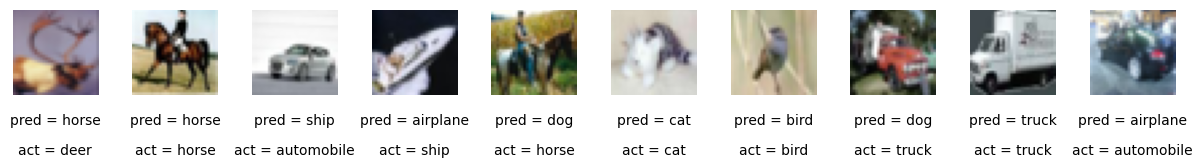

In [8]:
#결과를 보기좋게
import matplotlib.pyplot as plt
n_to_show = 10 
indices = np.random.choice( range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5,-0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7,'act = ' + str(actual_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.imshow(img)
    

## 합성곱 신경망
- MLP구조에선 이미지를 단순히 펼쳐서 벡터로 학습하였기때문에 정확도가 높여지지 못했다. 공간 구조적인 요소를 학습할수있는 딥러닝 구조인 CNN을(convolution) 활용해본다.
- strides: 필터가 입력데이터위를 이동하는 크기
- padding: 입력데이터의 바깥영역을 포함해서 특성맵을 생성할수있게 해준다.이렇게하지않으면 이미지의 가운데의 특정으로 치우쳐서 학습한다.
- 합성곱층을 중간에 넣고, 마지막에 다시 일차원벡터로 펼쳐서 출력dense층 유닛에 연결해서 예측값을 출력한다.


In [10]:
from tensorflow.keras import layers
input_layer = layers.Input(shape=(64,64,1))
conv_layer_1 = layers.Conv2D(
    filter = 2, 
    kernel_size = (3,3),
    strides = 1,
    padding = "same"
)(input_layer)

### Batch_normalization
- gradient exploding: 공변량변화(covariate shift):가중치의 출력스케일이 조정되지않으면 학습할수록 가중치가 산으로 가버림, 
- 배치정규화(batch_normalization): 그레이디언트 폭주의 해결책, 배치정규화층을 중간에 넣어서 각 입력의 채널별로 평균과 표준편차를계산한다음 평균을 빼고 표준편차로 나누어 정규화하는것, 정규화한 입력을 r스케일로 조정하고 b로 이동시켜 출력한다. 
- momenmtum: 클수록 이전값의 비중이크며 새로운값의 영향이 적다 0~1 default=0.99

### Drop_out
- 모델이 학습데이터셋에 대해 너무잘학습하고 새로운것에 대해 예측정확도가 떨어지면 overfitting 이라한다.
- 이를 해결하기위해 regulation 기법을 사용한다.
- dropout은 훈련과정에서이전층 유닛을 랜던하게 선택하여 출력을 0으로 만든다.
- 이렇게 하면 과대적합이 줄어든다.=>과도한 학습데이터 의존을 줄여 오히려 더 나은 성능을 낸다.
- 예측할때는 드롭하지않고 전체네트워크를 사용한다.
- 요즘에는 배치정규화도 과대적합을 억제하기때문에 배치정규화만 쓰는 추세



In [17]:
# CNN 만들기
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(64,64,1))
conv_layer_1 = layers.Conv2D(
    filter = 2, 
    kernel_size = (3,3),
    strides = 1,
    padding = "same"
)(input_layer)

input_layer = layers.Input((32,32,3))

x = layers.Conv2D(filters = 32, kernel_size = 3,
                  strides = 1, padding = 'same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation('softmax')(x)

model = models.Model(input_layer, output_layer)

model.summary()




Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_16 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_17 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                         

In [20]:
# 훈련하기
from tensorflow.keras import optimizers

opt = optimizers.Adam( learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['acc'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=5,
          shuffle=True,
          validation_data=(x_test,y_test)
)


Epoch 1/5
391/391 [==============================] - 85s 206ms/step - loss: 1.3881 - acc: 0.5101 - val_loss: 1.1853 - val_acc: 0.5727
Epoch 2/5
391/391 [==============================] - 77s 197ms/step - loss: 1.1186 - acc: 0.6057 - val_loss: 1.4546 - val_acc: 0.5282
Epoch 3/5
391/391 [==============================] - 74s 189ms/step - loss: 0.9734 - acc: 0.6604 - val_loss: 1.0921 - val_acc: 0.6167
Epoch 4/5
391/391 [==============================] - 70s 179ms/step - loss: 0.8923 - acc: 0.6853 - val_loss: 0.9363 - val_acc: 0.6743
Epoch 5/5
391/391 [==============================] - 70s 180ms/step - loss: 0.8282 - acc: 0.7095 - val_loss: 0.9744 - val_acc: 0.6588


In [24]:
# 모델 평가하기
model.evaluate(x_test,y_test,batch_size = 1000 )


10/10 [==============================] - 4s 353ms/step - loss: 0.9744 - acc: 0.6588


[0.9743638634681702, 0.6588000059127808]

In [22]:
# 예측해보기
CLASSES = \
    np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
preds = model.predict(x_test)
# np.argmax 최대값의 위치 반환 = 예측 클래스의 인덱스를 확인한다
preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]

print(preds_single)
print(actual_single)

313/313 [==============================] - 7s 22ms/step
['cat' 'ship' 'ship' ... 'dog' 'automobile' 'horse']
['cat' 'ship' 'ship' ... 'dog' 'automobile' 'horse']


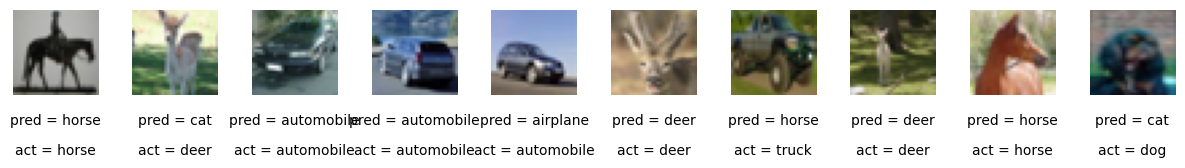

In [23]:
#결과를 보기좋게
import matplotlib.pyplot as plt
n_to_show = 10 
indices = np.random.choice( range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5,-0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7,'act = ' + str(actual_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.imshow(img)